# Objective: 

 Objective is to comprehend the driving factors (or driver variables) that are responsible for loan default ie variables that are strong signs of default.  This knowledge can serve as a basis for the  portfolio and risk assessment.

### Assignment Summary :
You are employed by Lending Club, a consumer finance company that focuses on giving urban consumers different kinds of loans. This company, which specializes in personal loans, business loans, and financing for medical procedures, is the biggest online lender. Through a speedy web interface, borrowers can easily obtain loans with lower interest rates. Based on the applicant's profile, the company must determine whether to approve the loan when it receives the application. When an individual applies for a loan, the company has two options:

1. Loan accepted: Three scenarios arise if the business approves the loan, as outlined below:


    Completely paid: The loan (principal and interest) has been paid in full by the applicant.

    Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These 
    candidates are not labelled as 'defaulted'.

    Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)



#### Important Columns
  * Colums that are used to identify  default loan application 
* **Customer Demographics**
  * Annual Income (annual_inc) 
  * Home Ownership (home_ownership) 
  * Employment Length (emp_length)  
  * Debt to Income (dti) 
  * State (addr_state)
* **Loan Attributes**
  * Loan Ammount (loan_amt) 
  * Grade (grade)
  * Term (term)
  * Loan Date (issue_date)
  * Purpose of Loan (purpose)
  * Verification Status (verification_status)
  * Interest Rate (int_rate)
  * Installment (installment)
  * Public Records (public_rec) 
  * Public Records Bankruptcy  (public_rec_bankruptcy) 

#### Ignored Columns
* The following types of columns will be ignored in the analysis. This is a generic categorization of the columns which will be ignored in our approach and not the full list.
   * **Customer Behaviour Columns** - Columns which describes customer behaviour will not contribute to the analysis. The current analysis is at the time of loan application but the customer behaviour variables generate post the approval of loan applications. Thus these attributes wil not be considered towards the loan approval/rejection process.
   * Granular Data - Columns which describe next level of details which may not be required for the analysis. For example grade may be relevant for creating business outcomes and visualizations, sub grade is be very granular and will not be used in the analysis

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data file
df = pd.read_csv('loan.csv')

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
##Discribe dataframe
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
##colums of dataframe
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data Cleaning and Manipulation


In [6]:
# Check ID is unique and no dubilicate data
df.id.duplicated().sum()

0

In [7]:
df.shape

(39717, 111)

In [8]:
# Dropping all the columns whose all the records are NaN or Null
new_df = df.dropna(axis='columns', how="all")

In [9]:
new_df.shape

(39717, 57)

##### we can observe more than 50% columns has all the records are NaN or Null 

In [10]:
new_df=new_df.drop_duplicates()

In [11]:
new_df=new_df.dropna(axis='rows',how="all")
new_df.shape

(39717, 57)

In [12]:
# check missing values
missing = 100 * (new_df.isnull().sum()/new_df.shape[0])
missing

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
new_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [14]:
column_titles = {
     'id':'unique number',
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_title':'Employment title',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income', 
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec':'derogatory public records',
    'pub_rec_bankruptcies': 'Bankruptcies Record'
    
    
    
}




In [15]:
req_df=new_df[column_titles.keys()]

In [16]:
req_df.shape

(39717, 20)

In [17]:
req_df = req_df.rename(columns = column_titles)

In [18]:
req_df

,unique number,Loan Amount,Funded Amount,Funded Amount Investors,Loan Term,Interest Rate,Installment,Grade,Employment title,Employment Length,Home Owner Status,Annual Income,Verification Status,Issue Date,Loan Status,Purpose of Loan,State,Debt To Income Ratio,derogatory public records,Bankruptcies Record
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0,NaN


In [19]:
req_df['Loan Status'].value_counts()

Loan Status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

Loan Status Column has 3 distict values  we will only consider with laon status as Fully paid or charged off


In [20]:
req_df_anl=req_df[req_df['Loan Status'] != 'Current']

In [21]:
req_df_anl

,unique number,Loan Amount,Funded Amount,Funded Amount Investors,Loan Term,Interest Rate,Installment,Grade,Employment title,Employment Length,Home Owner Status,Annual Income,Verification Status,Issue Date,Loan Status,Purpose of Loan,State,Debt To Income Ratio,derogatory public records,Bankruptcies Record
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0,NaN


In [22]:
req_df_anl['Employment Length'] = req_df_anl['Employment Length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})


In [23]:
req_df_anl['Interest Rate'] =req_df_anl['Interest Rate'].str.strip('%').astype(float)

In [24]:
req_df_anl['Interest Rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: Interest Rate, Length: 38577, dtype: float64

# Derived Columns

In [25]:
#converting to date type
req_df_anl['Issue Date'] = pd.to_datetime(req_df_anl['Issue Date'], format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
req_df_anl['Issue Date'] = req_df_anl['Issue Date'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)



In [26]:
#issue_d column
req_df_anl['issue_d_year'] = req_df_anl['Issue Date'].dt.year
req_df_anl['issue_d_month'] = req_df_anl['Issue Date'].dt.strftime('%b')
req_df_anl['issue_d_weekday'] = req_df_anl['Issue Date'].dt.weekday
#data type conversion of year and weekday
req_df_anl['issue_d_year'] = req_df_anl['issue_d_year'].astype(object)
req_df_anl['issue_d_weekday'] = req_df_anl['issue_d_weekday'].astype(object)



In [27]:
req_df_anl.columns

Index(['unique number', 'Loan Amount', 'Funded Amount',
       'Funded Amount Investors', 'Loan Term', 'Interest Rate', 'Installment',
       'Grade', 'Employment title', 'Employment Length', 'Home Owner Status',
       'Annual Income', 'Verification Status', 'Issue Date', 'Loan Status',
       'Purpose of Loan', 'State', 'Debt To Income Ratio',
       'derogatory public records', 'Bankruptcies Record', 'issue_d_year',
       'issue_d_month', 'issue_d_weekday'],
      dtype='object')

In [28]:
req_df_anl['Loan Amount'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: Loan Amount, dtype: float64

In [29]:
req_df_anl['Loan Amount'].unique

<bound method Series.unique of 0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: Loan Amount, Length: 38577, dtype: int64>

# Univariate Analysis

In [30]:
req_df_anl.columns

Index(['unique number', 'Loan Amount', 'Funded Amount',
       'Funded Amount Investors', 'Loan Term', 'Interest Rate', 'Installment',
       'Grade', 'Employment title', 'Employment Length', 'Home Owner Status',
       'Annual Income', 'Verification Status', 'Issue Date', 'Loan Status',
       'Purpose of Loan', 'State', 'Debt To Income Ratio',
       'derogatory public records', 'Bankruptcies Record', 'issue_d_year',
       'issue_d_month', 'issue_d_weekday'],
      dtype='object')

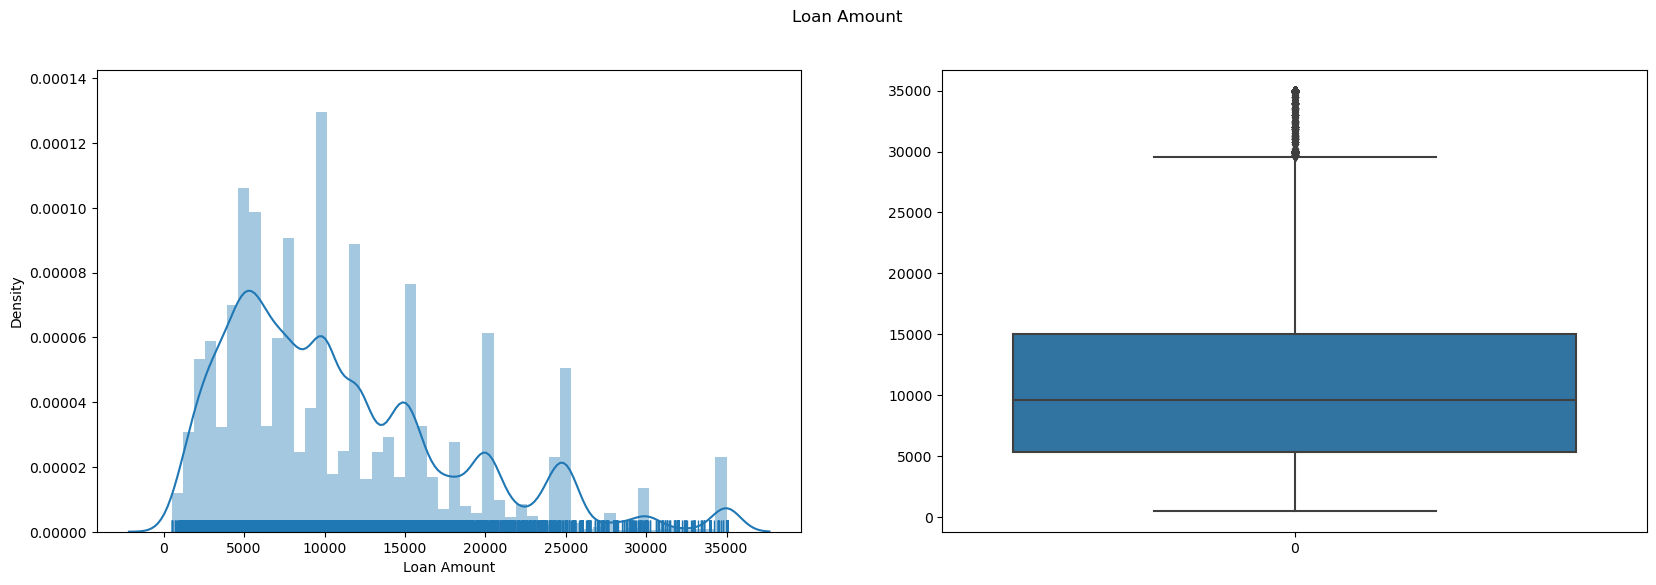

In [31]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(a=req_df_anl['Loan Amount'], rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=req_df_anl['Loan Amount'])
plt.suptitle('Loan Amount')
plt.show()


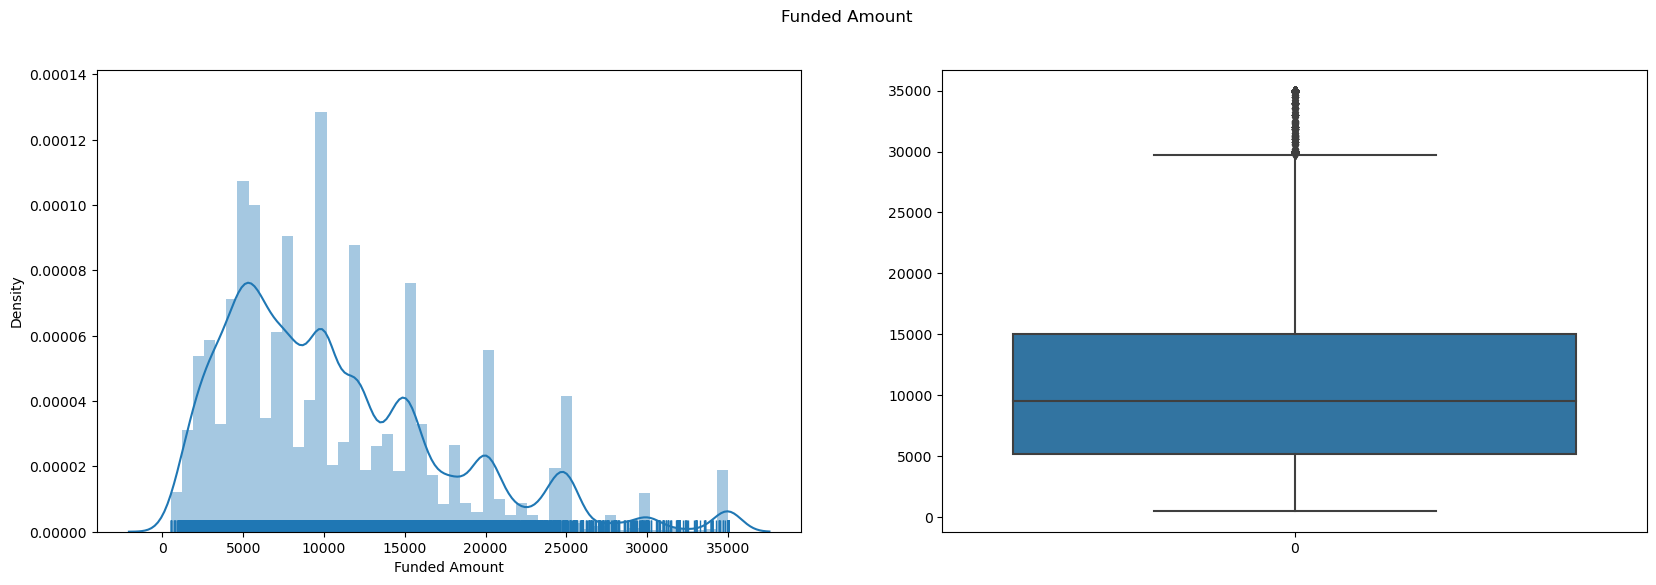

In [32]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(a=req_df_anl['Funded Amount'], rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=req_df_anl['Funded Amount'])
plt.suptitle('Funded Amount')
plt.show()

###### if we could observe the Funded Amount and LoanAmount we can observer most of the amount is between 5000 to 15000 and we had a 50% quatile as 10000 only few has taken above 30000

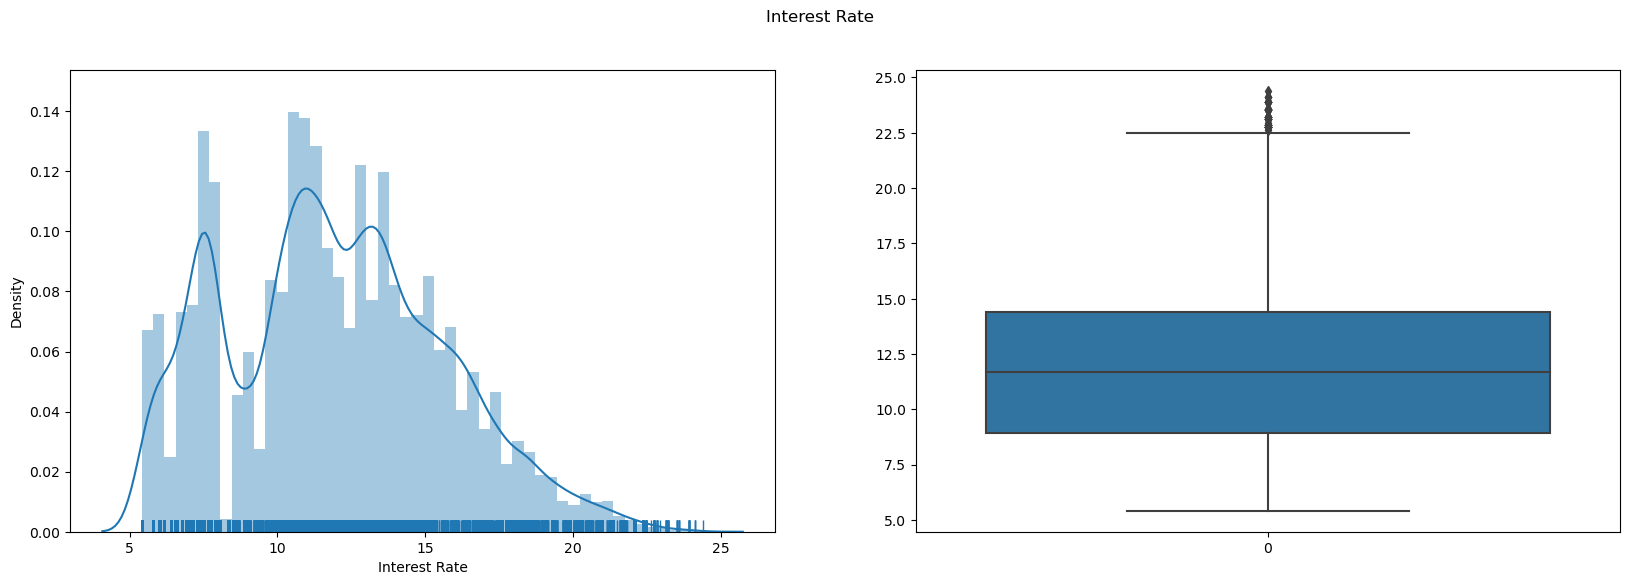

In [33]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(a=req_df_anl['Interest Rate'], rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=req_df_anl['Interest Rate'])
plt.suptitle('Interest Rate')
plt.show()

 interest rates lies between 9% to 14.5%. only few  took loan at higher rates of interest i.e., 22.5%

In [34]:
req_df_anl.columns

Index(['unique number', 'Loan Amount', 'Funded Amount',
       'Funded Amount Investors', 'Loan Term', 'Interest Rate', 'Installment',
       'Grade', 'Employment title', 'Employment Length', 'Home Owner Status',
       'Annual Income', 'Verification Status', 'Issue Date', 'Loan Status',
       'Purpose of Loan', 'State', 'Debt To Income Ratio',
       'derogatory public records', 'Bankruptcies Record', 'issue_d_year',
       'issue_d_month', 'issue_d_weekday'],
      dtype='object')

<Axes: xlabel='Loan Term'>

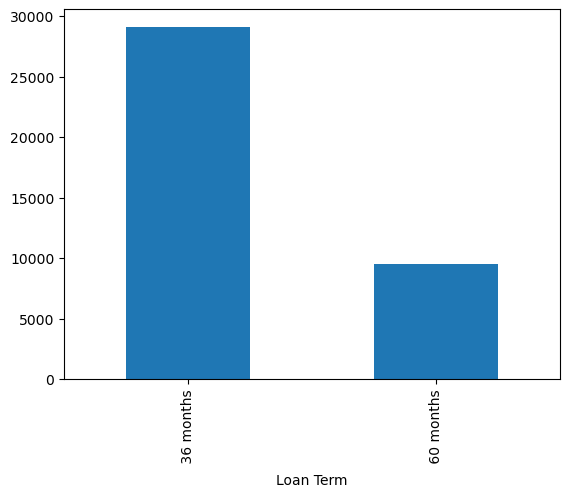

In [35]:

req_df_anl['Loan Term'].value_counts().plot.bar()


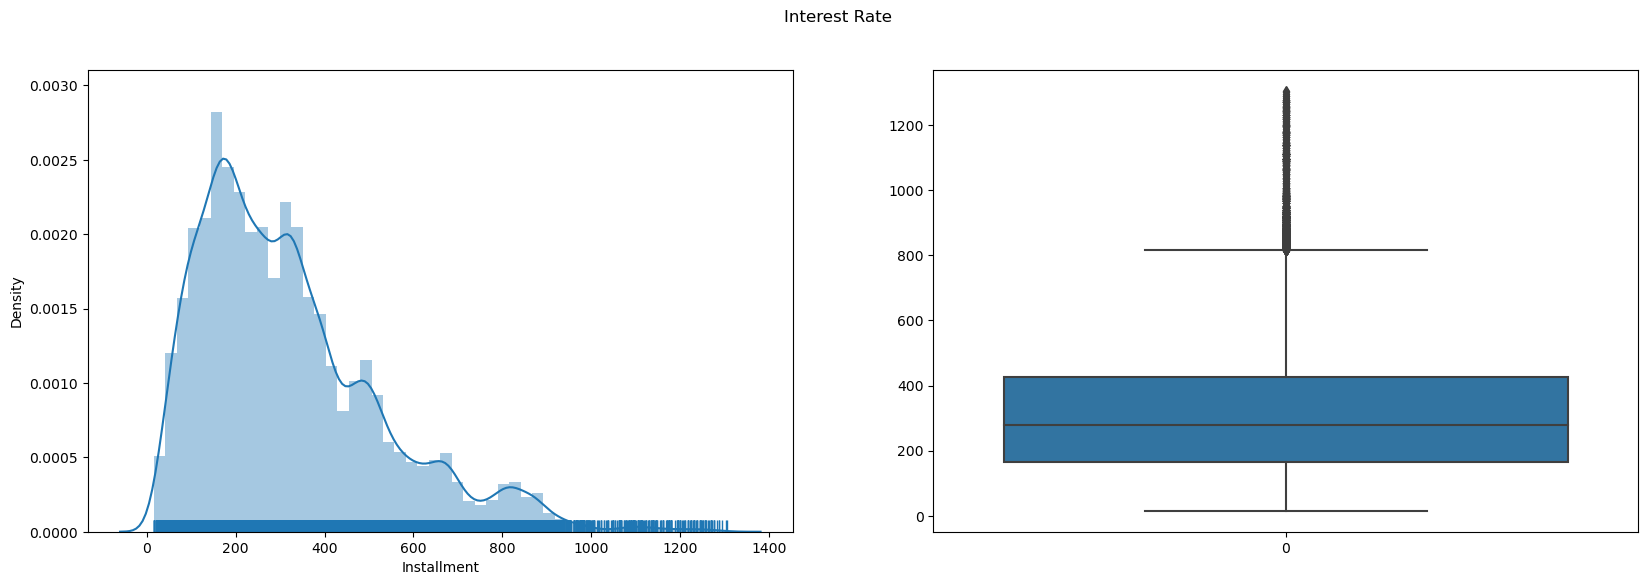

In [43]:
#req_df_anl['Installment'].value_counts().plot.bar()
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(a=req_df_anl['Installment'], rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=req_df_anl['Installment'])
plt.suptitle('Interest Rate')
plt.show()

<Axes: xlabel='Home Owner Status'>

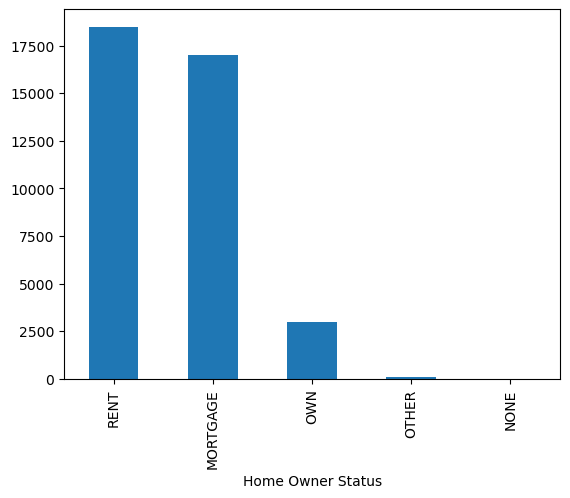

In [37]:
req_df_anl['Home Owner Status'].value_counts().plot.bar()

In [38]:
req_df_anl.columns

Index(['unique number', 'Loan Amount', 'Funded Amount',
       'Funded Amount Investors', 'Loan Term', 'Interest Rate', 'Installment',
       'Grade', 'Employment title', 'Employment Length', 'Home Owner Status',
       'Annual Income', 'Verification Status', 'Issue Date', 'Loan Status',
       'Purpose of Loan', 'State', 'Debt To Income Ratio',
       'derogatory public records', 'Bankruptcies Record', 'issue_d_year',
       'issue_d_month', 'issue_d_weekday'],
      dtype='object')

<Axes: xlabel='issue_d_year'>

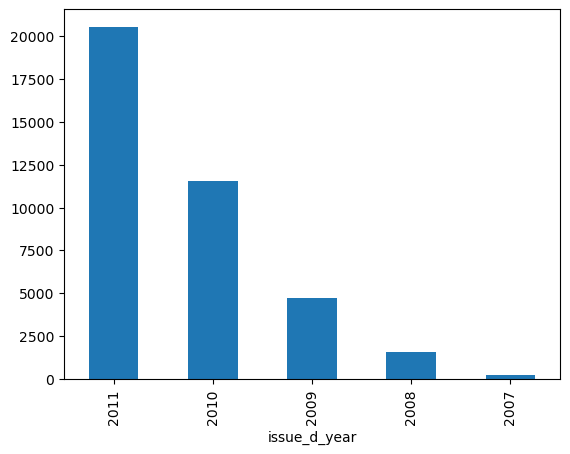

In [39]:
req_df_anl['issue_d_year'].value_counts().plot.bar()



<Axes: xlabel='issue_d_month'>

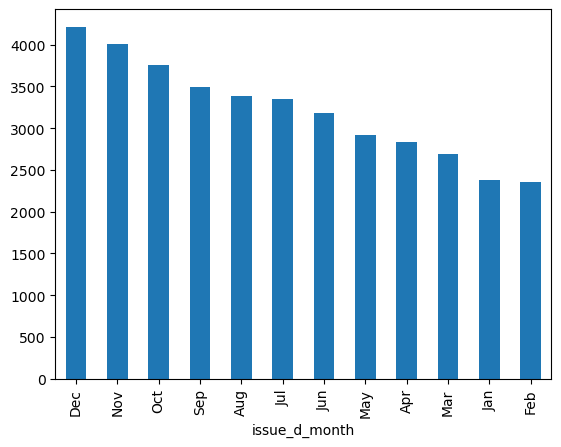

In [40]:
req_df_anl['issue_d_month'].value_counts().plot.bar()

In [41]:
req_df_anl.columns

Index(['unique number', 'Loan Amount', 'Funded Amount',
       'Funded Amount Investors', 'Loan Term', 'Interest Rate', 'Installment',
       'Grade', 'Employment title', 'Employment Length', 'Home Owner Status',
       'Annual Income', 'Verification Status', 'Issue Date', 'Loan Status',
       'Purpose of Loan', 'State', 'Debt To Income Ratio',
       'derogatory public records', 'Bankruptcies Record', 'issue_d_year',
       'issue_d_month', 'issue_d_weekday'],
      dtype='object')

<Axes: xlabel='Employment Length'>

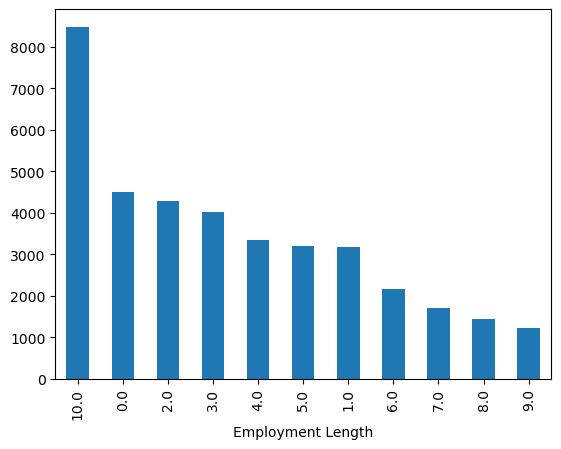

In [42]:
req_df_anl['Employment Length'].value_counts().plot.bar()

<Axes: xlabel='Loan Status'>

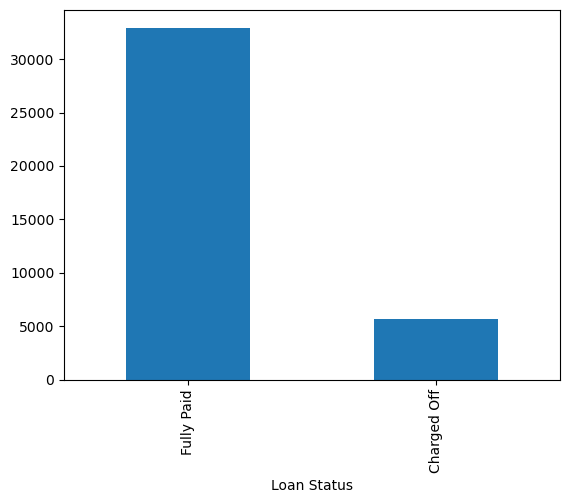

In [44]:
req_df_anl['Loan Status'].value_counts().plot.bar()

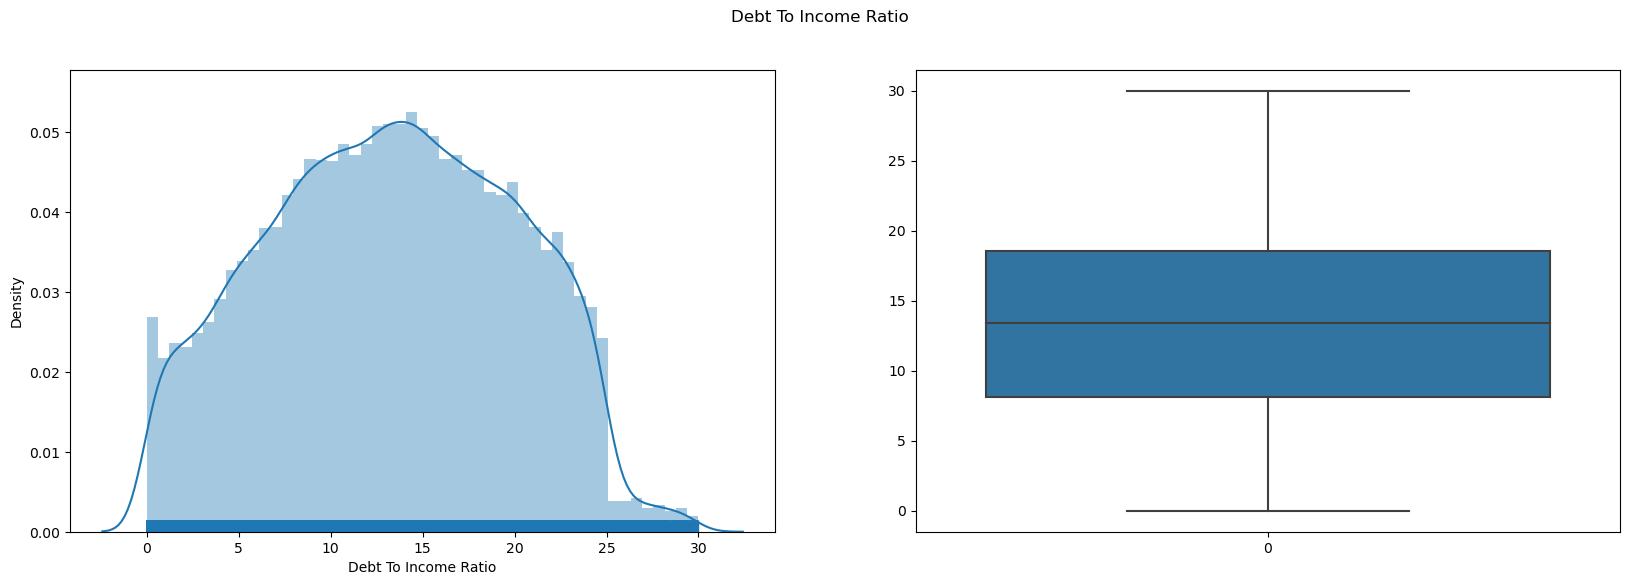

In [47]:
#req_df_anl['Debt To Income Ratio'].value_counts().plot.bar()
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(a=req_df_anl['Debt To Income Ratio'], rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=req_df_anl['Debt To Income Ratio'])
plt.suptitle('Debt To Income Ratio')
plt.show()

<Axes: xlabel='Verification Status'>

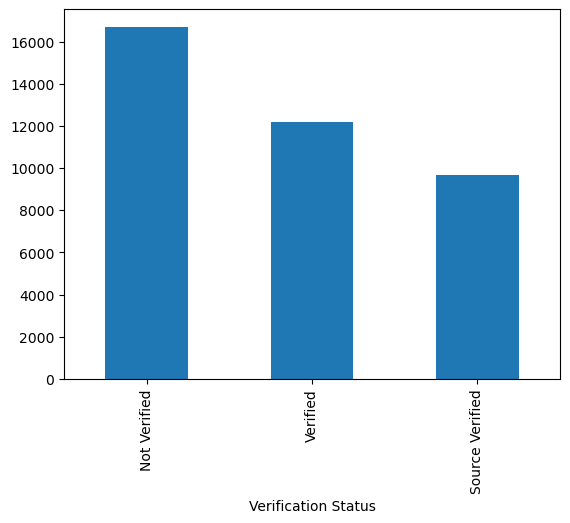

In [48]:
req_df_anl['Verification Status'].value_counts().plot.bar()

<Axes: xlabel='Grade'>

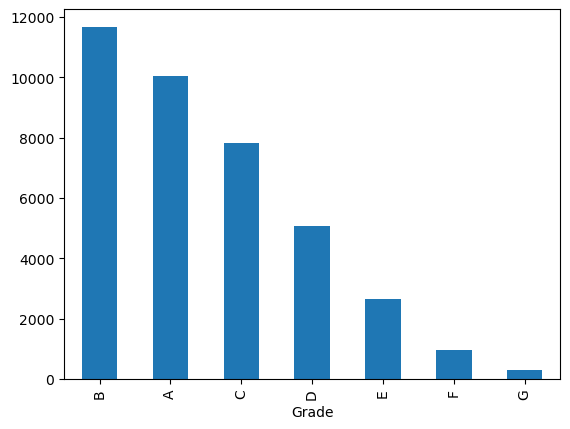

In [49]:
req_df_anl['Grade'].value_counts().plot.bar()

In [50]:
req_df_anl.columns

Index(['unique number', 'Loan Amount', 'Funded Amount',
       'Funded Amount Investors', 'Loan Term', 'Interest Rate', 'Installment',
       'Grade', 'Employment title', 'Employment Length', 'Home Owner Status',
       'Annual Income', 'Verification Status', 'Issue Date', 'Loan Status',
       'Purpose of Loan', 'State', 'Debt To Income Ratio',
       'derogatory public records', 'Bankruptcies Record', 'issue_d_year',
       'issue_d_month', 'issue_d_weekday'],
      dtype='object')

## Bivariate Analysis

<Axes: xlabel='Employment Length', ylabel='count'>

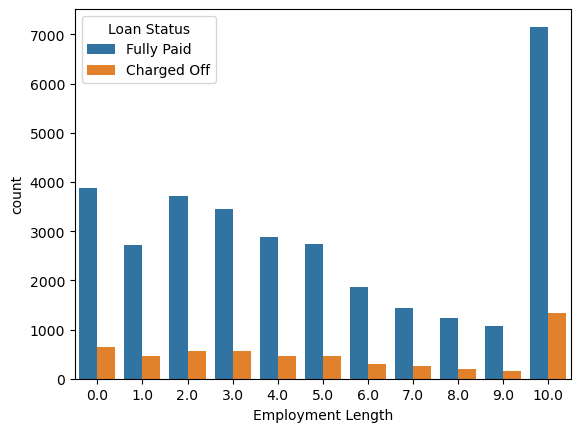

In [71]:
sns.countplot(x ='Employment Length', hue = 'Loan Status', data = req_df_anl)

it was observed if employment experience more than 10 years had low  chages of chargeoff

<Axes: xlabel='Loan Term', ylabel='count'>

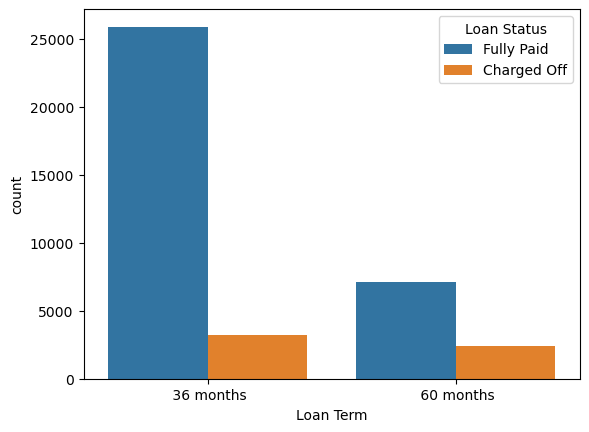

In [77]:
sns.countplot(x ='Loan Term', hue = 'Loan Status', data = req_df_anl)

<Axes: xlabel='Employment Length', ylabel='count'>

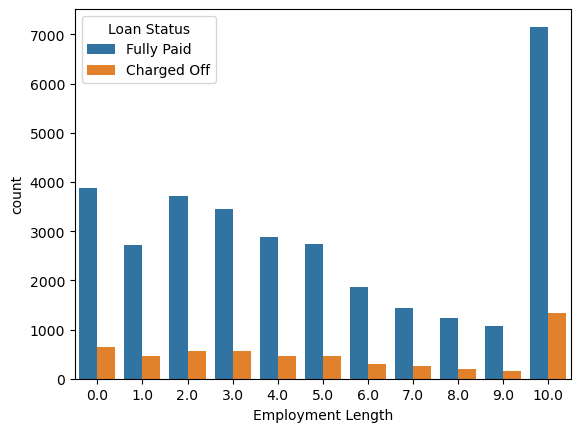

In [74]:
sns.countplot(x ='Grade', hue = 'Loan Status', data = req_df_anl)

<Axes: xlabel='Home Owner Status', ylabel='count'>

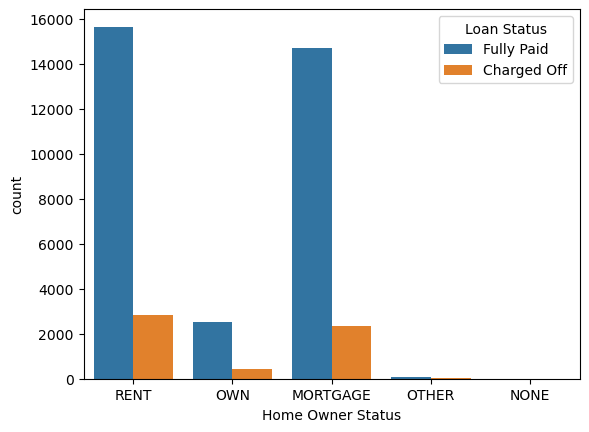

In [75]:
sns.countplot(x ='Home Owner Status', hue = 'Loan Status', data = req_df_anl)

<Axes: xlabel='Verification Status', ylabel='count'>

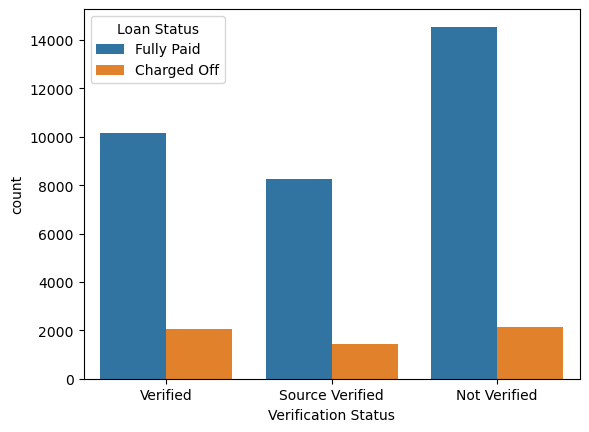

In [78]:
sns.countplot(x ='Verification Status', hue = 'Loan Status', data = req_df_anl)

<Axes: xlabel='Purpose of Loan', ylabel='count'>

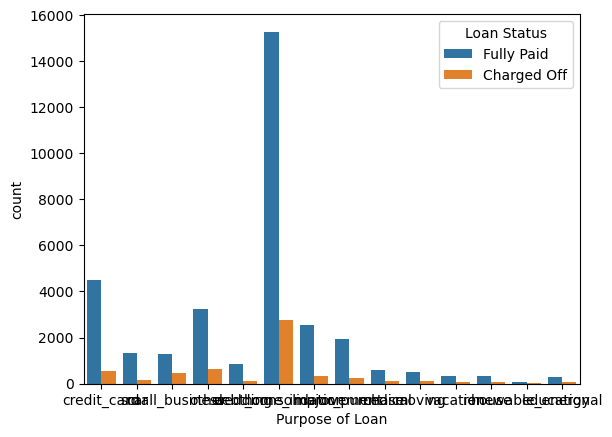

In [79]:
sns.countplot(x ='Purpose of Loan', hue = 'Loan Status', data = req_df_anl)

<Axes: xlabel='derogatory public records', ylabel='count'>

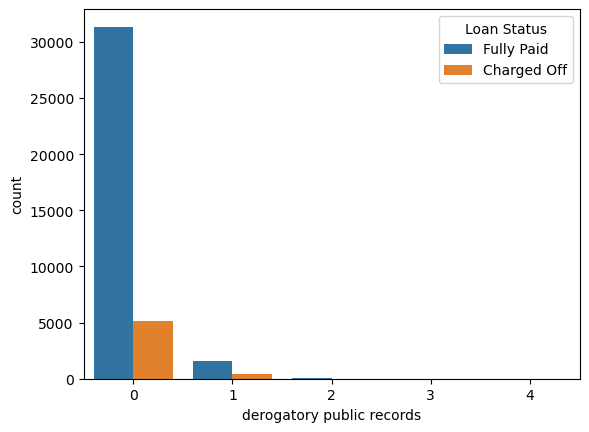

In [80]:
sns.countplot(x ='derogatory public records', hue = 'Loan Status', data = req_df_anl)

<Axes: xlabel='Bankruptcies Record', ylabel='count'>

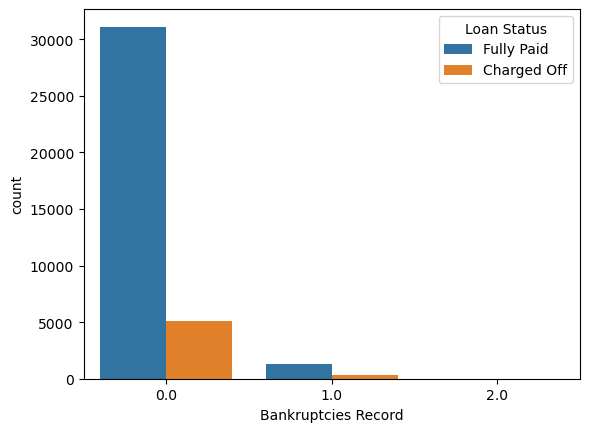

In [81]:
sns.countplot(x ='Bankruptcies Record', hue = 'Loan Status', data = req_df_anl)

<Axes: xlabel='issue_d_year', ylabel='count'>

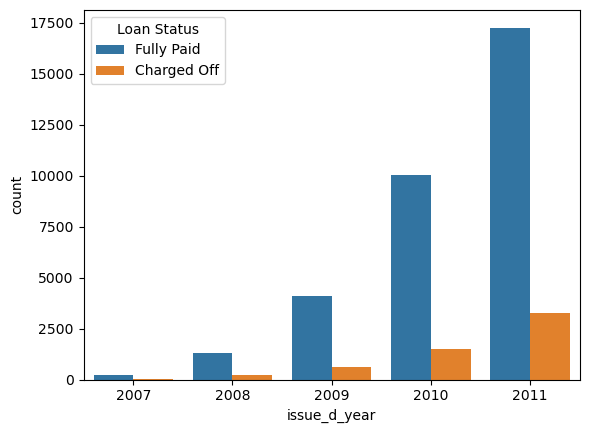

In [82]:
sns.countplot(x ='issue_d_year', hue = 'Loan Status', data = req_df_anl)

<Axes: xlabel='issue_d_month', ylabel='count'>

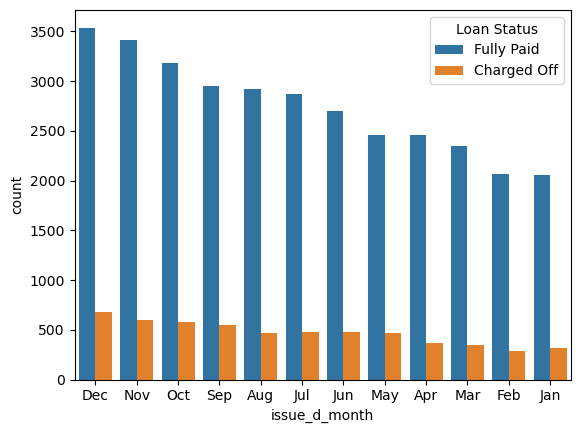

In [83]:
sns.countplot(x ='issue_d_month', hue = 'Loan Status', data = req_df_anl)

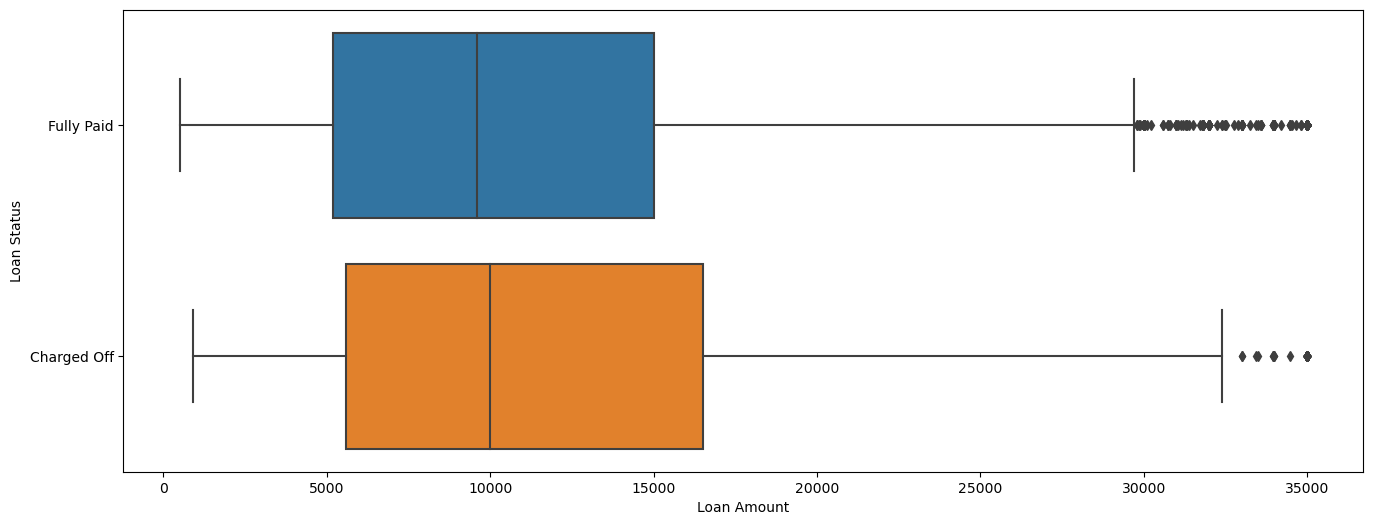

In [89]:
plt.figure(figsize=(16,6))
sns.boxplot(x ='Loan Amount', y = 'Loan Status', data = req_df_anl)
plt.show()

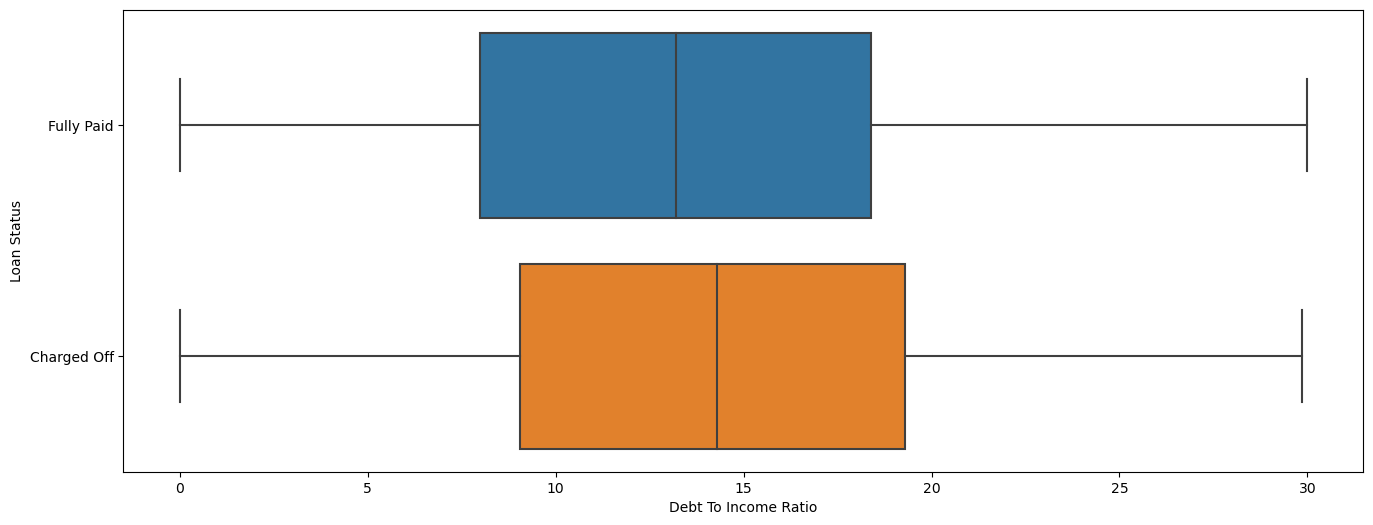

In [90]:
plt.figure(figsize=(16,6))
sns.boxplot(x ='Debt To Income Ratio', y = 'Loan Status', data = req_df_anl)
plt.show()

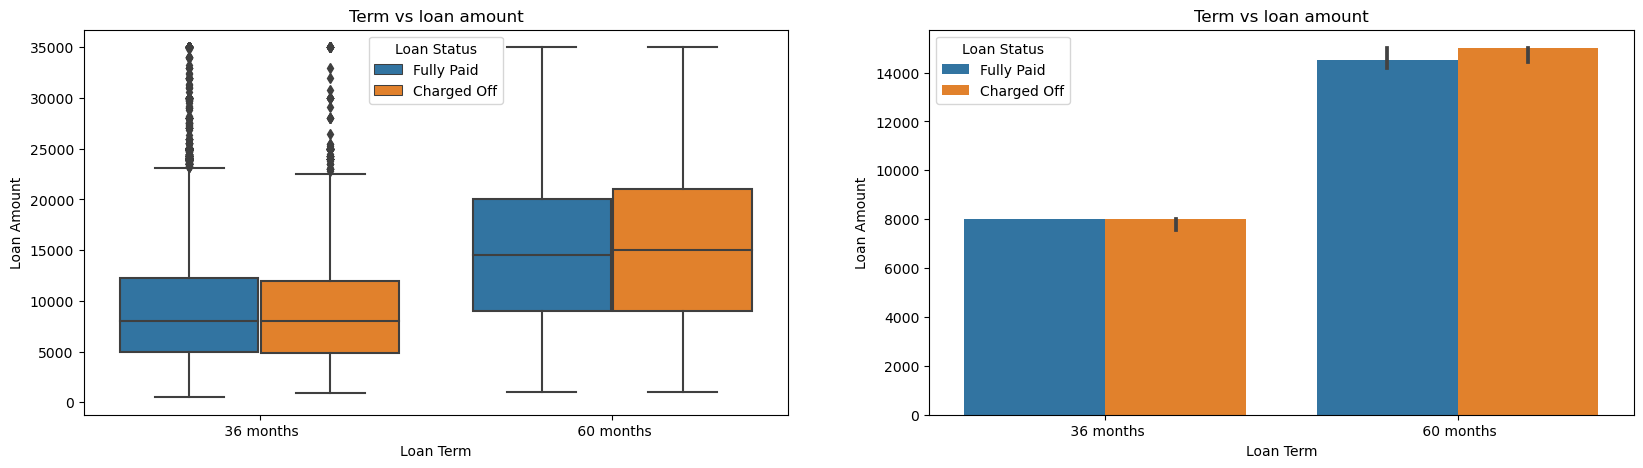

In [60]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='Loan Term', y='Loan Amount', hue='Loan Status', data=req_df_anl)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='Loan Term', y='Loan Amount', hue='Loan Status', data=req_df_anl, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()


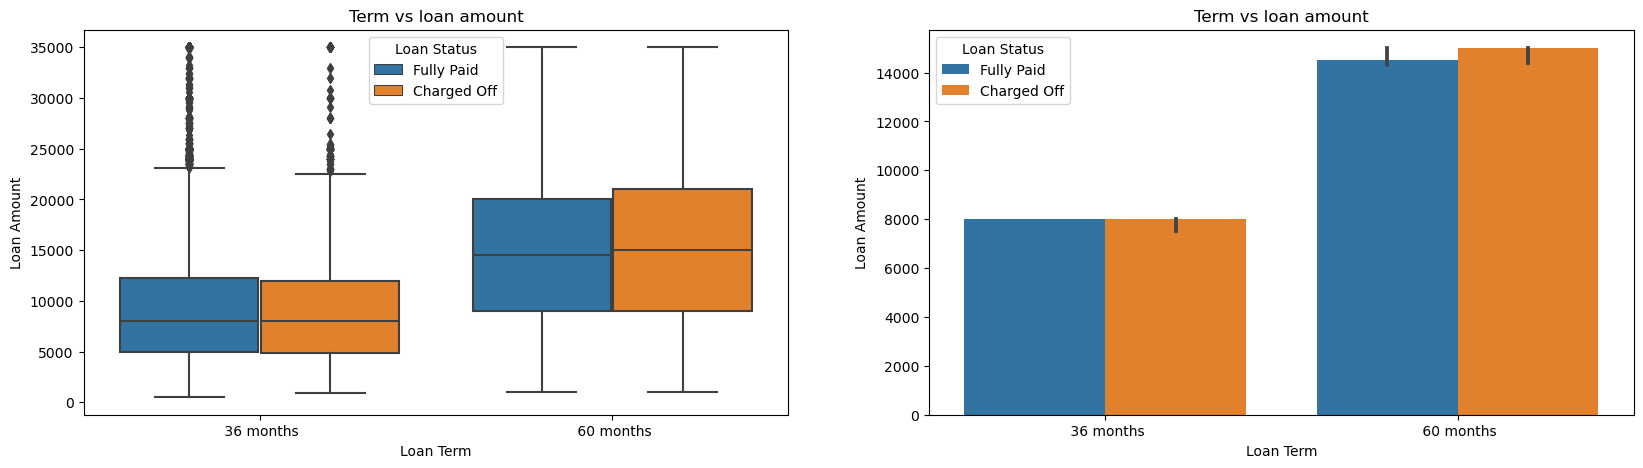

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='Loan Term', y='Loan Amount', hue='Loan Status', data=req_df_anl)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='Loan Term', y='Loan Amount', hue='Loan Status', data=req_df_anl, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()


## The high interest loans for 60 months should be decreased by Lending club due to their high rate of loan default.
## Detecting defaulters can be made easier with the use of grades as a metric. The lending club needs to collect more information. 
## Before issuing loans to borrowers with low grades (G to A).
## It is necessary for Lending Club to decrease the number of loans given to borrowers from California, Florida, and other states. 
## NY to make profits.
## The probability of defaulting on small business loans is higher. Lending club should stop/reduce issuing the loans to them.
## Homeowners with mortgages are taking higher loans and defaulting on approved ones. 
##  Lending club should stop giving loans to this category when loan amount requested is more than 12000.
##  People with more number of public derogatory records are having more chance of filing a bankruptcy. 
## Lending club should make sure there are no public derogatory records for borrower
